In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv

In [28]:
df1 = pd.read_csv('season_stats/2014-2015_season_stats.csv')

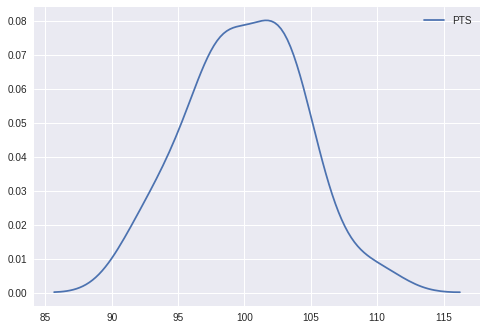

In [29]:
plot = sns.kdeplot(df1['PTS'])
plt.show(plot)

In [30]:
df2 = pd.read_csv('season_stats/2015-2016_season_stats.csv')

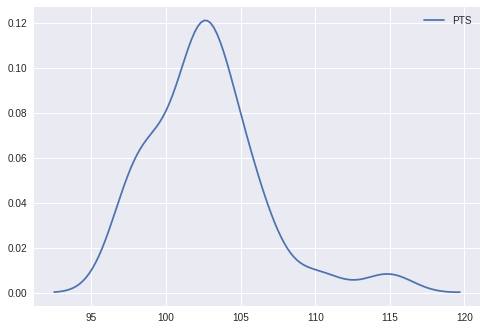

In [31]:
plot1 = sns.kdeplot(df2['PTS'])
plt.show(plot1)

In [32]:
df3 = pd.read_csv('season_stats/2016-2017_season_stats.csv')

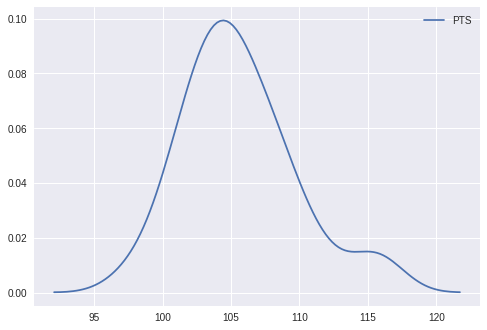

In [33]:
plot2 = sns.kdeplot(df3['PTS'])
plt.show(plot2)

In [34]:
df4 = pd.read_csv('season_stats/2017-2018_season_stats.csv')

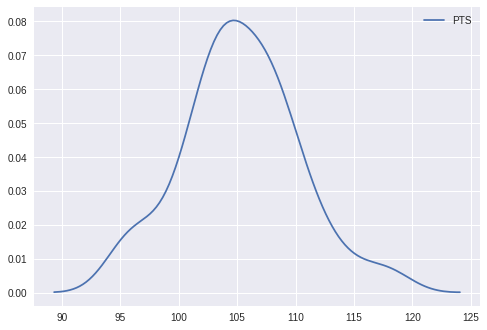

In [35]:
plot3 = sns.kdeplot(df4['PTS'])
plt.show(plot3)

As 4 densidades de pontuação são aproximadamente normais, porém com certos distúrbios variantes para cada densidade. Isso mostra um balanceamento das pontuações dos times, sendo 2017-2018 a temporada com menores maior discrepância, o que é evidenciado pelo intervalo alargado do gráfico, e que pode ser comprovado pelas médias:

In [36]:
print('média e variancia 2014-2015: ' + str(np.mean(df1['PTS'])) + ',' + str(np.var(df1['PTS'])))
print('média e variancia 2015-2016: ' + str(np.mean(df2['PTS'])) + ',' + str(np.var(df2['PTS'])))
print('média e variancia 2016-2017: ' + str(np.mean(df3['PTS'])) + ',' + str(np.var(df3['PTS'])))
print('média e variancia 2017-2018: ' + str(np.mean(df4['PTS'])) + ',' + str(np.var(df4['PTS'])))

média e variancia 2014-2015: 100.01666666666667,17.67272222222222
média e variancia 2015-2016: 102.66333333333333,13.876322222222225
média e variancia 2016-2017: 105.58999999999999,16.479566666666667
média e variancia 2017-2018: 105.29666666666667,24.255655555555553


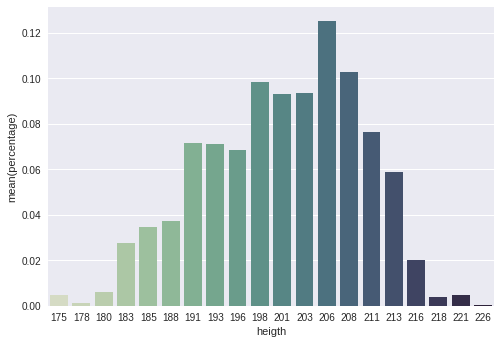

In [37]:
#pode haver problemas de diretorio aqui dependendo da ordem em que se executar o codigo
#Ex: rodar essa parte primeiro, depois rodar a codigo mais acima
#Será necessario alterar o diretorio para a pasta inicial do projeto la no inicio
#por exemplo os.chdir("/home/bruno/Desktop/codigos/Top.Av.Int.Art./2017-2-projeto-crp3-bvcl-plal" )
pathName = os.getcwd()
numFiles = []
fileNames = os.listdir(pathName)

for file in fileNames:
    if file.endswith("roster_info"):
        fd = os.open(file, os.O_RDONLY )
        os.fchdir(fd)
        break

pathName = os.getcwd()
numFiles = []
fileNames = os.listdir(pathName)

for file in fileNames:
    numFiles.append(pathName+'/'+file)
count=0
ttl=0;
allHeights=[]
allCollege=[]
for f in numFiles:
    os.chdir(f)
    hei = 0
    for f2 in os.listdir(os.getcwd()):
        cs = pd.read_csv(f2)
        hei=0
        for n in cs['Height']:
            ttl+=1
            parts = n.split('-')
            hei =(((30.48*int(parts[0])) + (2.54*int(parts[1]))))
            hei = int(hei+0.5)
            allHeights.append(hei)
            if(hei>=210):
                count+=1
        for c in cs['College']:
            if(str(c)!="nan"):
                allCollege.append(c)
            
df_heights = pd.DataFrame({'height':allHeights})
df_colleges = pd.DataFrame({'college':allCollege})

df_height_count =pd.DataFrame({'count':df_heights['height'].value_counts(sort=False)})
df_college_count =pd.DataFrame({'count':df_colleges['college'].value_counts()})

def percentage_height(row):
    return row['count']/2141
def percentage_college(row):
    return row['count']/1763


df_height_count['percentage']=df_height_count.apply(percentage_height, axis=1)
df_height_count=df_height_count.sort_index()

hs=[]
for r in df_height_count.itertuples():
    hs.append(r.Index)
    
df_height_count['heigth']=hs

df_college_count['percentage']=df_college_count.apply(percentage_college, axis=1)

col=[]
for r in df_college_count.itertuples():
    col.append(str(r.Index).replace("University","").replace("of","").split(",")[0])
df_college_count['college']=col

sns.set(font_scale=1)
ax = sns.barplot(x = df_height_count['heigth'], y = df_height_count['percentage'], palette = sns.cubehelix_palette(len(df_height_count), start=.5, rot=-.75))
plt.show(ax)

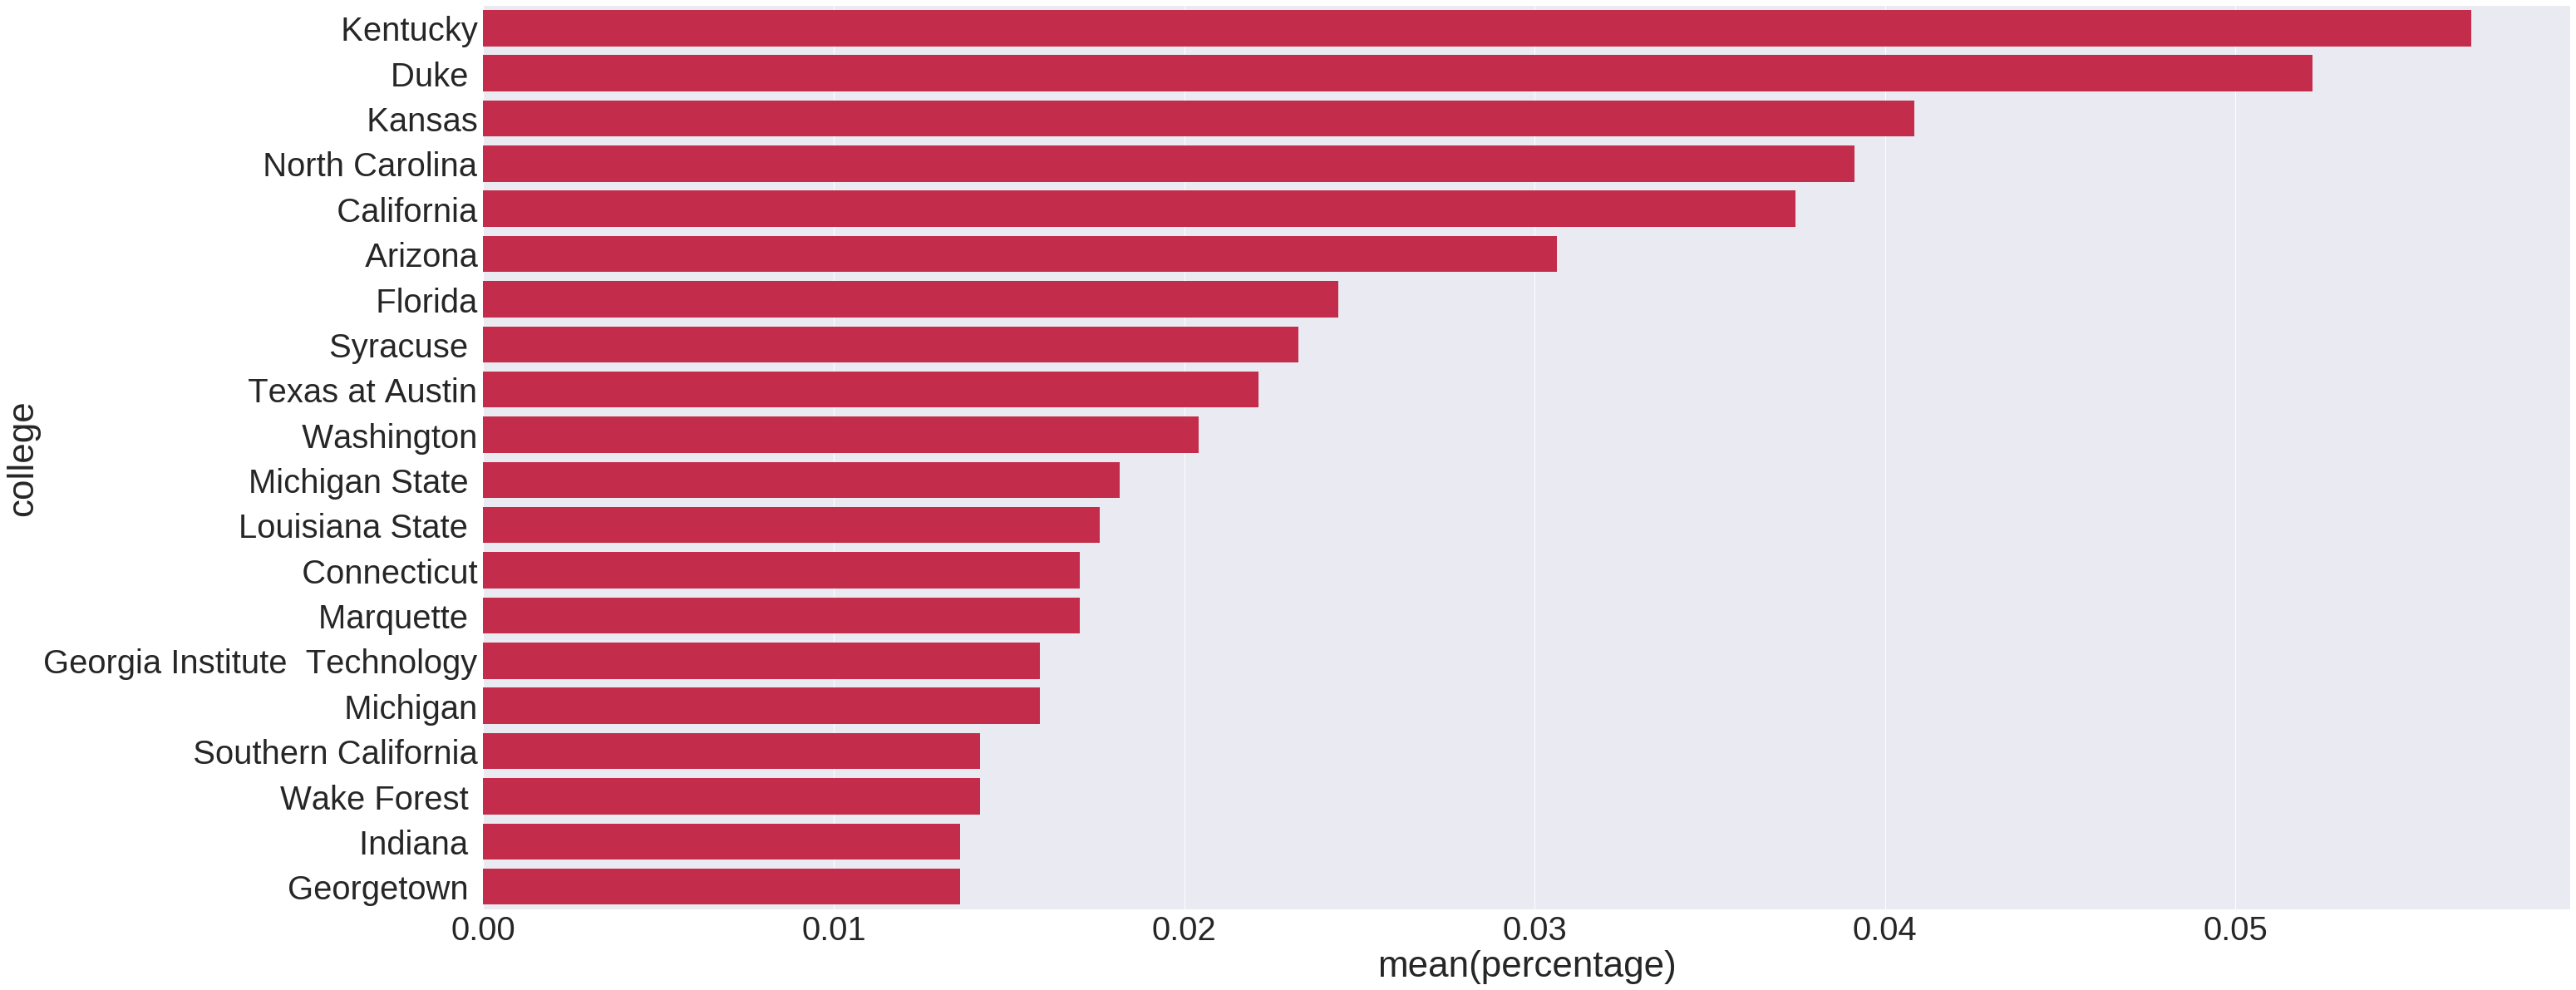

In [38]:
sns.set(font_scale=4)
f,graphics=plt.subplots(1,1, figsize=(45, 20))

ax = sns.barplot(x = df_college_count[:20]['percentage'], y = df_college_count[:20]['college'], color='crimson')

plt.show(ax)